In [5]:
import json
import pandas as pd

import matplotlib.pyplot as plt

In [8]:
def parse_results(path: str) -> pd.DataFrame:
    records = []
    with open(path, 'r') as f:
        buffer = []
        depth = 0

        for raw in f:
            line = raw.strip()
            if not line:
                continue  # skip blank lines

            # Track nesting of braces
            depth += line.count('{')
            depth -= line.count('}')

            buffer.append(raw)
            # If we’ve closed all opened braces, process one full JSON object
            if depth == 0 and buffer:
                chunk = ''.join(buffer)
                obj = json.loads(chunk)
                # same flattening logic as before
                for uid, details in obj.items():
                    params = details.pop('params')
                    flat = {'id': uid, **details}
                    for p, v in params.items():
                        if isinstance(v, list) and len(v) == 2:
                            flat[f'{p}_min'] = v[0]
                            flat[f'{p}_max'] = v[1]
                        else:
                            flat[p] = v
                    records.append(flat)
                buffer = []
    return pd.DataFrame(records)

In [9]:
path = "example_result.jsonl"
df = parse_results(path)

In [14]:
df.tail()

,id,score,total_ghosts,overall_ghost_rate,event_avg_ghost_rate,clone_percentage,max_slope_min,max_slope_max,max_tol_min,max_tol_max,scatter
995,cfc029f0-59a4-4b68-ad66-5ce8e6330d6a,47.750969,7,87.5,6.060606,0.0,0.000244,0.003662,0.000244,0.003662,0.202930
996,03fcc834-b04f-47fd-8613-c408a5ca7a5e,47.750870,7,87.5,6.060606,0.0,0.000244,0.003662,0.000244,0.003662,0.202148
997,5adc6a5d-f309-4185-b2a0-4ffa6324322e,47.750833,7,87.5,6.060606,0.0,0.000244,0.003662,0.000244,0.003662,0.202930
998,24b77033-8fa4-4f16-bb4b-1eae5619454f,47.750808,7,87.5,6.060606,0.0,0.000244,0.003174,0.000244,0.003174,0.202148
999,328644f9-ec84-4b73-bce9-c258fcaed659,47.750798,7,87.5,6.060606,0.0,0.000244,0.003662,0.000244,0.003662,0.202539


**plot the score / itterations**

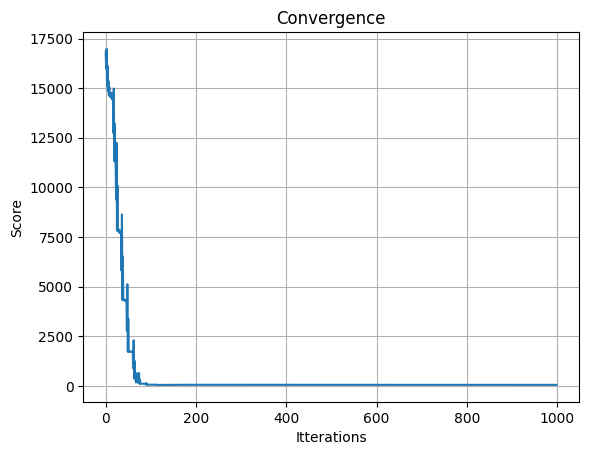

In [12]:
plt.figure()
plt.plot(df.index, df['score'])
plt.xlabel('Itterations')
plt.ylabel('Score')
plt.title('Convergence')
plt.grid()
plt.show()


In [ ]:
plt.figure()
plt.plot(df.index, df['event_avg_ghost_rate'])
plt.xlabel('Itterations')
plt.ylabel('Score')
plt.title('Convergence')
plt.grid()
plt.show()
